<a href="https://colab.research.google.com/github/samikshyasanskruti/MachineLearning-Practice-with-Python/blob/main/5_Predicting_Stock_Prices_with_Regression_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SAMIKSHYA SANSKRUTI SWAIN**

**2341019634**

# **REGRESSION ALGORITHMS**

**Sample Google historical Data**

In [ ]:
import yfinance as yf
df = yf.Ticker("GOOGL").history(period="max")
df.to_csv("GOOGL_historical_data.csv")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.483736,2.584576,2.383393,2.492181,893181924,0.0,0.0
2004-08-20 00:00:00-04:00,2.508822,2.709260,2.496155,2.690134,456686856,0.0,0.0
2004-08-23 00:00:00-04:00,2.750738,2.818544,2.708514,2.717207,365122512,0.0,0.0
2004-08-24 00:00:00-04:00,2.762908,2.771850,2.572406,2.604694,304946748,0.0,0.0
2004-08-25 00:00:00-04:00,2.606929,2.682435,2.580105,2.632760,183772044,0.0,0.0


**Plot stock close price over time**

Text(0, 0.5, 'Close Price')

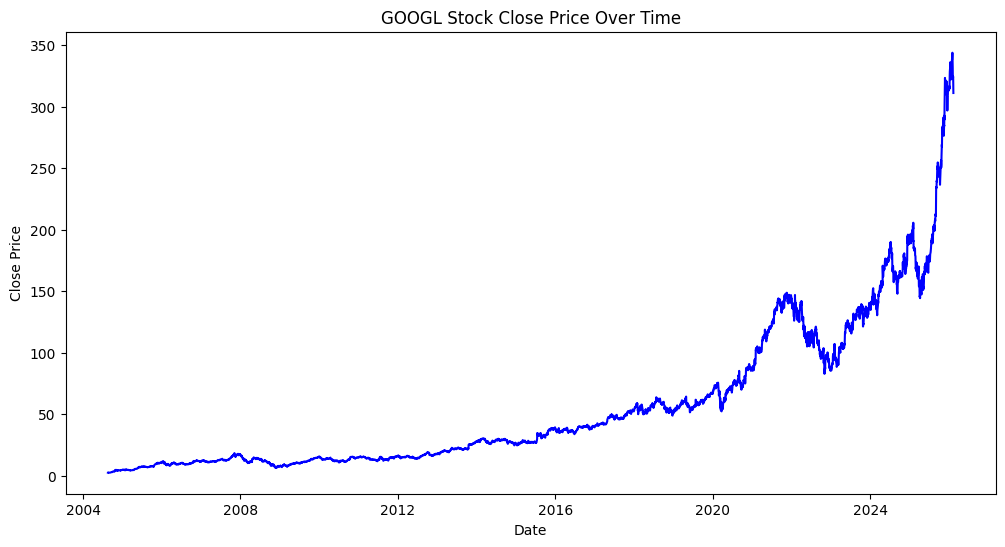

In [ ]:
import matplotlib . pyplot as plt
plt.figure ( figsize =(12,6) )
plt.plot (df['Close'] , label ='Close Price ', color ='blue')
plt.title ('GOOGL Stock Close Price Over Time')
plt.xlabel ('Date')
plt.ylabel ('Close Price')

**Define a function to find moving average and moving average ratio of closed price of last week,month, and year.**

In [ ]:
def moving_average_and_ratio_close ( data ) :
    data ['MA_week'] = df['Close ']. rolling ( window =5).mean().shift (1)
    data ['MA_month'] = df['Close ']. rolling ( window =21) . mean () . shift (1)
    data ['MA_year'] = df['Close']. rolling ( window =252) . mean () . shift (1)
    data ['MA_ratio_week_month'] = data ['MA_week'] / data ['MA_month']
    data ['MA_ratio_week_year'] = data ['MA_week'] / data ['MA_year']
    data ['MA_ratio_month_year'] = data ['MA_month'] / data ['MA_year']
    return data

**Normalize Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ***Prediction by SGDRegressor***

In [ ]:
SGDRegressor(loss='squared error', penalty='l2', alpha=0.0001,l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001,
shuffle=True, verbose=0, epsilon=0.1, random_state=None,learning_rate='invscaling', eta0=0.01, power_t=0.25,early_stopping=False, validation_fraction=0.1, n_iter_no_change=5,
warm_start=False, average=False)

SGDRegressor(loss='squared error')

**Build Linear Regression model by SGDRegressor**

In [ ]:
from sklearn . linear_model import SGDRegressor
sgd = SGDRegressor ( loss ='squared_error', penalty ='l2',max_iter =1000, alpha = 0.1, learning_rate ='constant',eta0=0.01, random_state =42)

**Remove NaN values and Train Test Split Data**

In [ ]:
df = df. dropna ( axis =0)
X = df. drop ( columns =['Close'] , axis =1)
Y = df['Close']
X_train = X[: int (0.8*len (X) ) ]
X_test = X[ int(0.8* len(X) ) :]
Y_train = Y[: int (0.8*len (Y) ) ]
Y_test = Y[ int(0.8* len(Y) ) :]

**Train the model**

In [ ]:
sgd .fit ( X_train , Y_train )
prediction = sgd. predict ( X_test )

**Calculate mean squared error**

In [ ]:
from sklearn . metrics import mean_squared_error
print ('error :', mean_squared_error (Y_test , prediction ) )

error : 4.722772732604542e+50


**Plot test & predicted data**

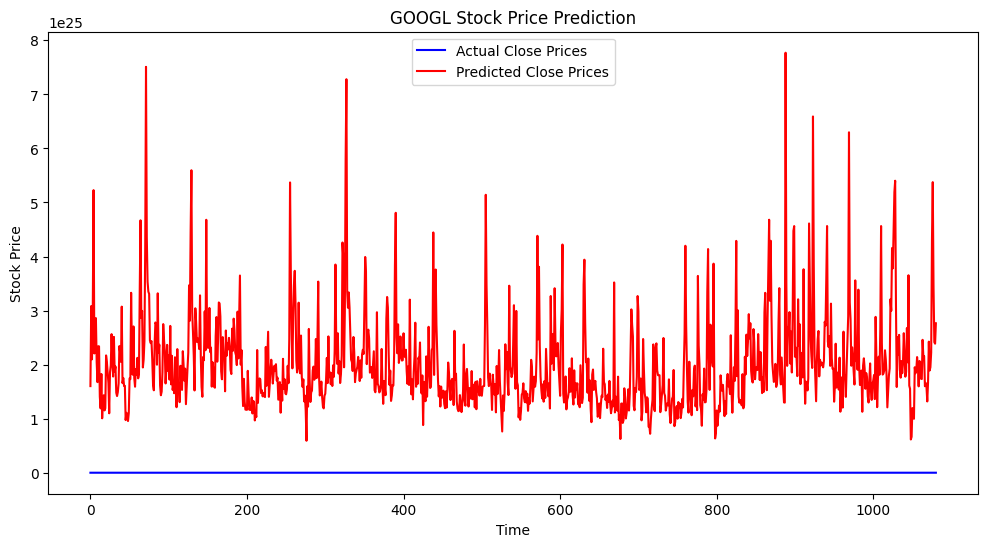

In [ ]:
import matplotlib . pyplot as plt
plt.figure ( figsize =(12,6) )
plt.plot ( Y_test .values , label ='Actual Close Prices ', color ='blue')
plt.plot ( prediction , label ='Predicted Close Prices', color ='red')
plt.title ('GOOGL Stock Price Prediction')
plt.xlabel ('Time')
plt.ylabel ('Stock Price')
plt.legend ()
plt.show ()

**Find Best Parameter for SGDRegressor**

In [ ]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(sgd, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, Y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.01, 'learning_rate': 'invscaling', 'penalty': 'l2'}


# ***Linear Regression by TensorFlow***

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([tf.keras.Input(shape=[X_train.shape[1]]), tf.keras.layers.Dense(units=1)])

In [ ]:
model . compile ( optimizer ='adam', loss ='mse')
model .fit( X_train , Y_train , epochs =50, batch_size =32,validation_split =0.2)

Epoch 1/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 41455088765501440.0000 - val_loss: 966572122308608.0000
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31068659547897856.0000 - val_loss: 764458813095936.0000
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25632605340696576.0000 - val_loss: 594713786712064.0000
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19569782261022720.0000 - val_loss: 455901047685120.0000
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14980753586651136.0000 - val_loss: 345095991721984.0000
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11266343462502400.0000 - val_loss: 255647106990080.0000
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7803819748491264.0000 - val_loss: 185582214971392.0000
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5958875744305152.0000 - val_loss: 131929097633792.0000
Epoch 9/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 48388422259179

In [ ]:
prediction = model . predict ( X_test )
print ('error :', mean_squared_error (Y_test , prediction ) )

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
error : 157050.78638013525


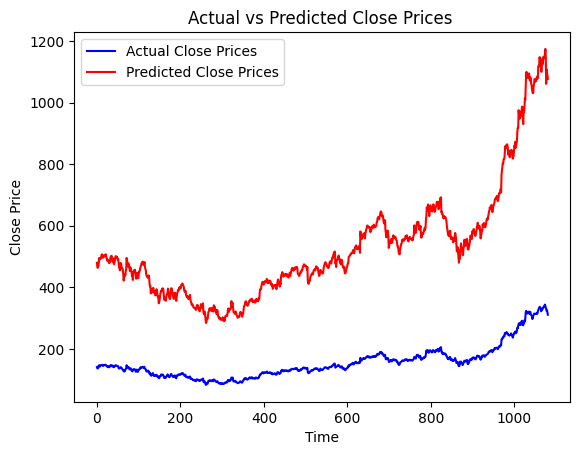

In [ ]:
plt.Figure ( figsize =(12,6) )
plt.plot ( Y_test .values , label ='Actual Close Prices', color ='blue')
plt.plot ( prediction , label ='Predicted Close Prices', color ='red')
plt.title ('Actual vs Predicted Close Prices ')
plt.xlabel ('Time')
plt.ylabel ('Close Price')
plt.legend ()
plt.show ()

# ***Prediction by DecisionTreeRegressor***

In [ ]:
from sklearn . tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor ( max_depth =10, min_samples_split =3,random_state =42)
regressor .fit( X_train , Y_train )

DecisionTreeRegressor(max_depth=10, min_samples_split=3, random_state=42)

In [ ]:
predictions = regressor . predict ( X_test )
print('error :', mean_squared_error (Y_test , predictions ) )

error : 2649.569706317673


**Find Best Parameter for DecisionTreeRegressor**

In [ ]:
param_grid_dt = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
print("Parameter grid for DecisionTreeRegressor defined.")

Parameter grid for DecisionTreeRegressor defined.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)

from sklearn.model_selection import GridSearchCV

grid_search_dt = GridSearchCV(dt_regressor, param_grid_dt, cv=tscv, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train_scaled, Y_train)

print("Best parameters for DecisionTreeRegressor:", grid_search_dt.best_params_)

Best parameters for DecisionTreeRegressor: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


# ***Prediction by RandomForestRegressor***

In [ ]:
from sklearn . ensemble import RandomForestRegressor
regressor = RandomForestRegressor ( n_estimators =100, max_depth =10,
min_samples_split =3, random_state =42)
regressor .fit( X_train , Y_train )
predictions = regressor . predict ( X_test )
print ('error :', mean_squared_error (Y_test , predictions ) )

error : 2674.810538110453


**Find Best Parameter For RandomForestRegressor**

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
print("Parameter grid for RandomForestRegressor defined.")

Parameter grid for RandomForestRegressor defined.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_regressor = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(rf_regressor, param_grid_rf, cv=tscv, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_scaled, Y_train)

print("Best parameters for RandomForestRegressor:", grid_search_rf.best_params_)

Best parameters for RandomForestRegressor: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
